# Importar GPPs das Torres, Alg e Satélite

In [1]:
%run ./load_flux_towers_data.ipynb

# Importações

In [2]:
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing
import pandas as pd
from mod17 import MOD17

# Calculando GPP com a BPLUT Otimizada Mensal - Lue Otimizado - Santarem

In [3]:
bplut_mensal_santarem = pd.read_csv('GA_Santarem.csv')
bplut_mensal_santarem = bplut_mensal_santarem[['LUE_Max', 'Tmin_min', 'Tmin_max', 'VPD_min', 'VPD_max']].to_numpy()

num_mes = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
for i in range(12):
    previsoes_santarem = MOD17._gpp(bplut_mensal_santarem[i], drivers_santarem_mes['arr_'+str(i)][0], drivers_santarem_mes['arr_'+str(i)][1], drivers_santarem_mes['arr_'+str(i)][2], drivers_santarem_mes['arr_'+str(i)][3])
    previsoes_santarem = pd.DataFrame(previsoes_santarem,index=index_santarem[index_santarem.month == i+1])
    
   

    #previsoes_santarem_pso = pd.concat([gpp_kgc_8d_2009_teste[ano2009],gpp_kgc_8d_2010_teste[ano2010],gpp_kgc_8d_2011_teste[ano2011]],axis=0)
    if i > 0:
        previsoes_santarem_2002 = pd.concat([previsoes_santarem_2002, previsoes_santarem['2002':'2002']], axis=0)
        previsoes_santarem_2003 = pd.concat([previsoes_santarem_2003, previsoes_santarem['2003':'2003']], axis=0)
        previsoes_santarem_2004 = pd.concat([previsoes_santarem_2004, previsoes_santarem['2004':'2004']], axis=0)
        previsoes_santarem_2005 = pd.concat([previsoes_santarem_2005, previsoes_santarem['2005':'2005']], axis=0)
        previsoes_santarem_2006 = pd.concat([previsoes_santarem_2006, previsoes_santarem['2006':'2006']], axis=0)
        previsoes_santarem_2008 = pd.concat([previsoes_santarem_2008, previsoes_santarem['2008':'2008']], axis=0)
        previsoes_santarem_2009 = pd.concat([previsoes_santarem_2009, previsoes_santarem['2009':'2009']], axis=0)
        previsoes_santarem_2010 = pd.concat([previsoes_santarem_2010, previsoes_santarem['2010':'2010']], axis=0)
        previsoes_santarem_2011 = pd.concat([previsoes_santarem_2011, previsoes_santarem['2011':'2011']], axis=0)
    else:
        previsoes_santarem_2002 = previsoes_santarem['2002':'2002']
        previsoes_santarem_2003 = previsoes_santarem['2003':'2003']
        previsoes_santarem_2004 = previsoes_santarem['2004':'2004']
        previsoes_santarem_2005 = previsoes_santarem['2005':'2005']
        previsoes_santarem_2006 = previsoes_santarem['2006':'2006']
        previsoes_santarem_2008 = previsoes_santarem['2008':'2008']
        previsoes_santarem_2009 = previsoes_santarem['2009':'2009']
        previsoes_santarem_2010 = previsoes_santarem['2010':'2010']
        previsoes_santarem_2011 = previsoes_santarem['2011':'2011']

previsoes_santarem_diario = pd.concat([previsoes_santarem_2002,
                                        previsoes_santarem_2003,
                                        previsoes_santarem_2004,
                                        previsoes_santarem_2005,
                                        previsoes_santarem_2006,
                                        previsoes_santarem_2008,
                                        previsoes_santarem_2009,
                                        previsoes_santarem_2010,
                                        previsoes_santarem_2011], axis=0)

gpp_2002 = previsoes_santarem_2002.resample('8D').sum()
gpp_2003 = previsoes_santarem_2003.resample('8D').sum()
gpp_2004 = previsoes_santarem_2004.resample('8D').sum()
gpp_2005 = previsoes_santarem_2005.resample('8D').sum()
gpp_2006 = previsoes_santarem_2006.resample('8D').sum()
gpp_2008 = previsoes_santarem_2008.resample('8D').sum()
gpp_2009 = previsoes_santarem_2009.resample('8D').sum()
gpp_2010 = previsoes_santarem_2010.resample('8D').sum()
gpp_2011 = previsoes_santarem_2011.resample('8D').sum()

previsoes_santarem = pd.concat([gpp_2002,
                                gpp_2003,
                                gpp_2004,
                                gpp_2005,
                                gpp_2006,
                                gpp_2008, 
                                gpp_2009, 
                                gpp_2010, 
                                gpp_2011],axis=0)
rmse_santarem = np.sqrt(mean_squared_error(y_true=observacoes_santarem, y_pred=previsoes_santarem))

# Plots do GPP Santarem

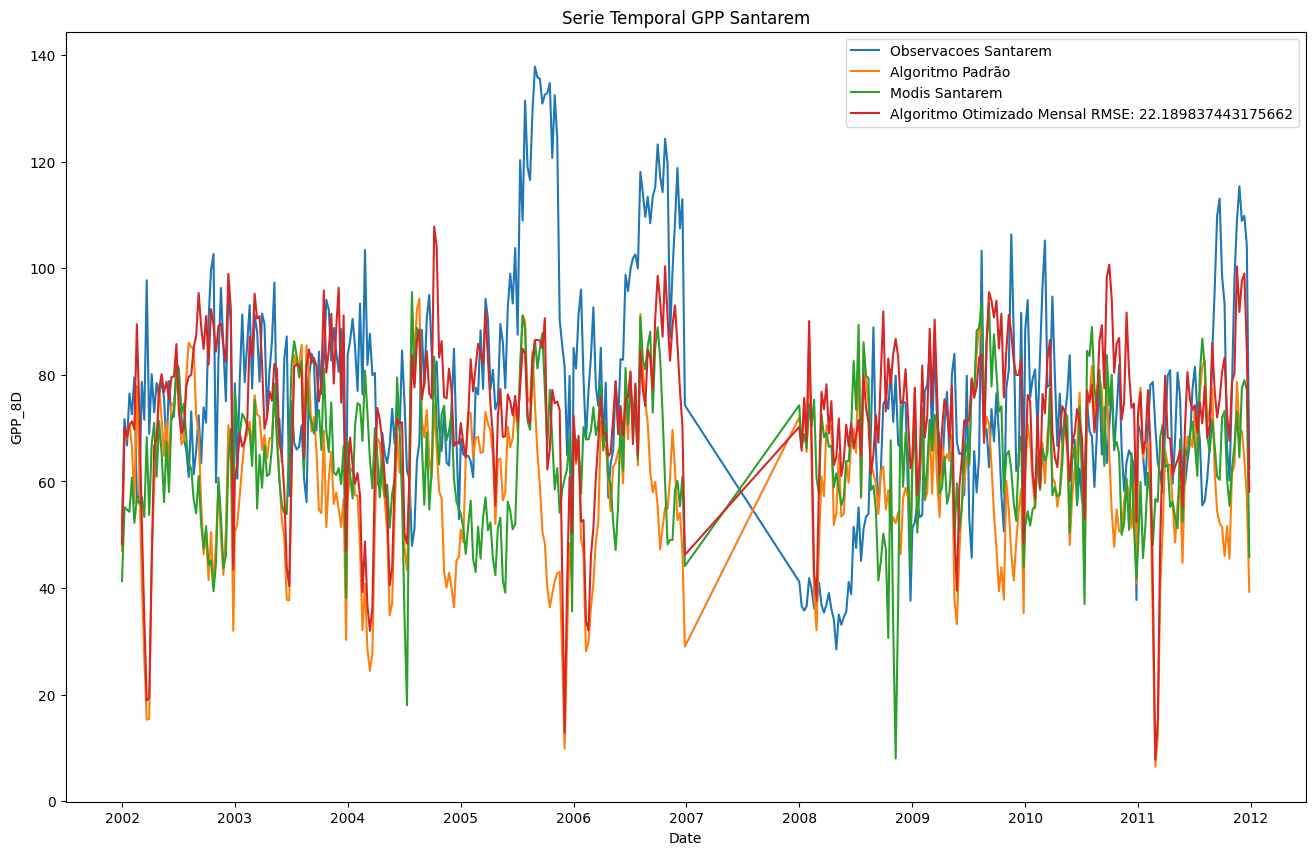

In [4]:
fig, ax = plt.subplots(figsize=(16, 10))

plt.xlabel("Date")
plt.ylabel("GPP_8D")
plt.title("Serie Temporal GPP Santarem")

plt.plot(observacoes_santarem)
plt.plot(gpp_algpad_santarem)
plt.plot(gpp_modis_santarem)
plt.plot(previsoes_santarem)

plt.legend(['Observacoes Santarem', 'Algoritmo Padrão', 'Modis Santarem', 'Algoritmo Otimizado Mensal RMSE: ' + str(rmse_santarem)])


# Box Plot Santarem

C:\Users\Alan Breno\AppData\Local\Temp\ipykernel_11692\372080273.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  observacoes_santarem_monthly = observacoes_santarem.resample('M').mean()
C:\Users\Alan Breno\AppData\Local\Temp\ipykernel_11692\372080273.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  new_params_santarem_monthly = previsoes_santarem.squeeze().resample('M').mean()
C:\Users\Alan Breno\AppData\Local\Temp\ipykernel_11692\372080273.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  santarem_gpp_mod_monthly = gpp_modis_santarem.resample('M').mean()
C:\Users\Alan Breno\AppData\Local\Temp\ipykernel_11692\372080273.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  smoothed_gpp_algpad_santarem_monthly = gpp_algpad_santarem.resample('M').mean()


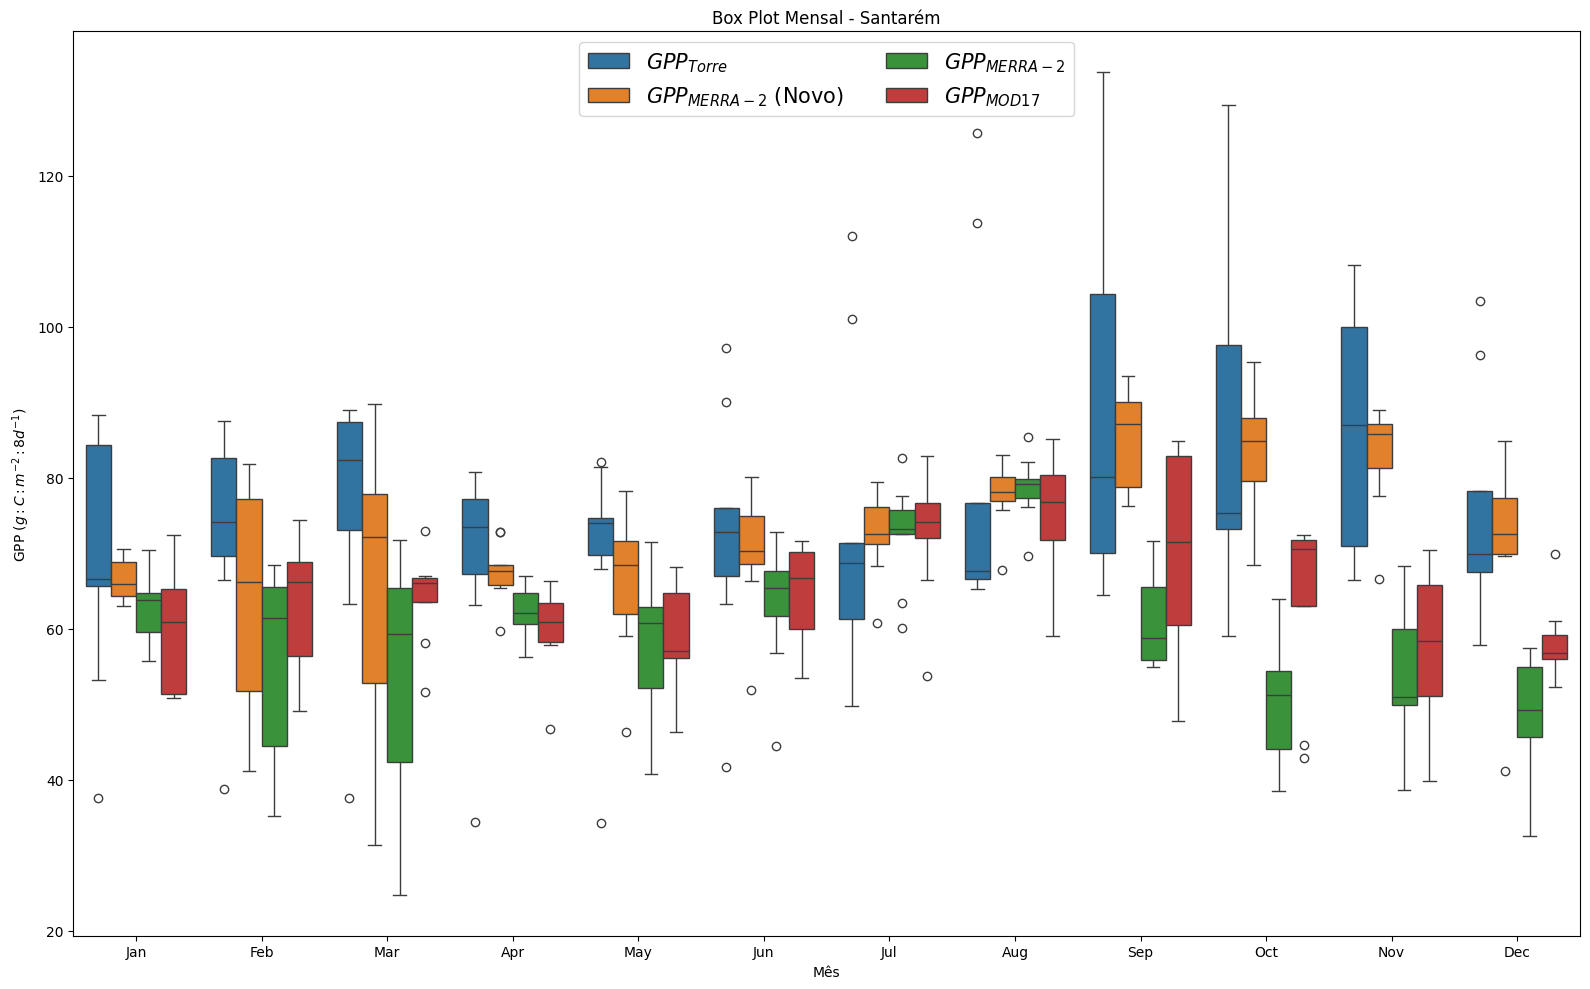

In [5]:
# Definindo os dados mensais de Santarém
observacoes_santarem_monthly = observacoes_santarem.resample('M').mean()
new_params_santarem_monthly = previsoes_santarem.squeeze().resample('M').mean()
santarem_gpp_mod_monthly = gpp_modis_santarem.resample('M').mean()
smoothed_gpp_algpad_santarem_monthly = gpp_algpad_santarem.resample('M').mean()

# Criando DataFrame para Santarém com os dados resampleados
df_santarem = pd.DataFrame({
    '$GPP_{Torre}$': observacoes_santarem_monthly,
    '$GPP_{MERRA-2}$ (Novo)': new_params_santarem_monthly,
    '$GPP_{MERRA-2}$': smoothed_gpp_algpad_santarem_monthly,
    '$GPP_{MOD17}$': santarem_gpp_mod_monthly,
})

# Resetando o índice para ter uma coluna de datas
df_santarem.reset_index(inplace=True)

# Derretendo o DataFrame para ter todas as variáveis em uma única coluna
df_santarem_melted = df_santarem.melt(id_vars='index', var_name='Medição de GPP', value_name='Valor')

# Obtendo o ano e o mês de cada data
df_santarem_melted['Ano'] = df_santarem_melted['index'].dt.year
df_santarem_melted['Mes'] = df_santarem_melted['index'].dt.strftime('%b')

# Plotando os boxplots em subplots
fig, axes = plt.subplots(figsize=(16, 10))  # Criando subplots com 2 linhas e 1 coluna

# Boxplot para Santarém
sns.boxplot(data=df_santarem_melted, x='Mes', y='Valor', hue='Medição de GPP', dodge=True, ax=axes)
axes.set_title('Box Plot Mensal - Santarém')  # Definindo título
axes.set_ylabel('GPP ($g : C : m^{-2} : 8d^{-1}$)')  # Definindo rótulo do eixo y
axes.set_xlabel('Mês')  # Definindo rótulo do eixo x
axes.legend(loc='upper center', fontsize=15, ncol=2)  # Definindo legenda
plt.tight_layout()  # Ajustando layout
#plt.savefig('BoxPlot_Santarem_Peru.png', dpi=300, bbox_inches='tight', pad_inches=0.2)  # Salvando figura
plt.show()

# Calculando GPP com a BPLUT Otimizada Mensal - Lue Otimizado - Peru

In [6]:
bplut_mensal_peru = pd.read_csv('GA_Peru.csv')
bplut_mensal_peru = bplut_mensal_peru[['LUE_Max', 'Tmin_min', 'Tmin_max', 'VPD_min', 'VPD_max']].to_numpy()

num_mes = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
for i in range(12):
    previsoes_peru = MOD17._gpp(bplut_mensal_peru[i], drivers_peru_mes['arr_'+str(i)][0], drivers_peru_mes['arr_'+str(i)][1], drivers_peru_mes['arr_'+str(i)][2], drivers_peru_mes['arr_'+str(i)][3])
    previsoes_peru = pd.DataFrame(previsoes_peru,index=index_peru[index_peru.month == i+1])
    
    
   
    if i > 0:
        previsoes_peru_2018 = pd.concat([previsoes_peru_2018, previsoes_peru['2018':'2018']], axis=0)
        previsoes_peru_2019 = pd.concat([previsoes_peru_2019, previsoes_peru['2019':'2019']], axis=0)
        
    else:
        previsoes_peru_2018 = previsoes_peru['2018':'2018']
        previsoes_peru_2019 = previsoes_peru['2019':'2019']
        
previsoes_peru_diario = pd.concat([previsoes_peru_2018, previsoes_peru_2019], axis=0)
gpp_2018 = previsoes_peru_2018.resample('8D').sum()
gpp_2019 = previsoes_peru_2019.resample('8D').sum()


previsoes_peru = pd.concat([gpp_2018,gpp_2019],axis=0)
rmse_peru = np.sqrt(mean_squared_error(y_true=observacoes_peru, y_pred=previsoes_peru))

# Plot do GPP Peru

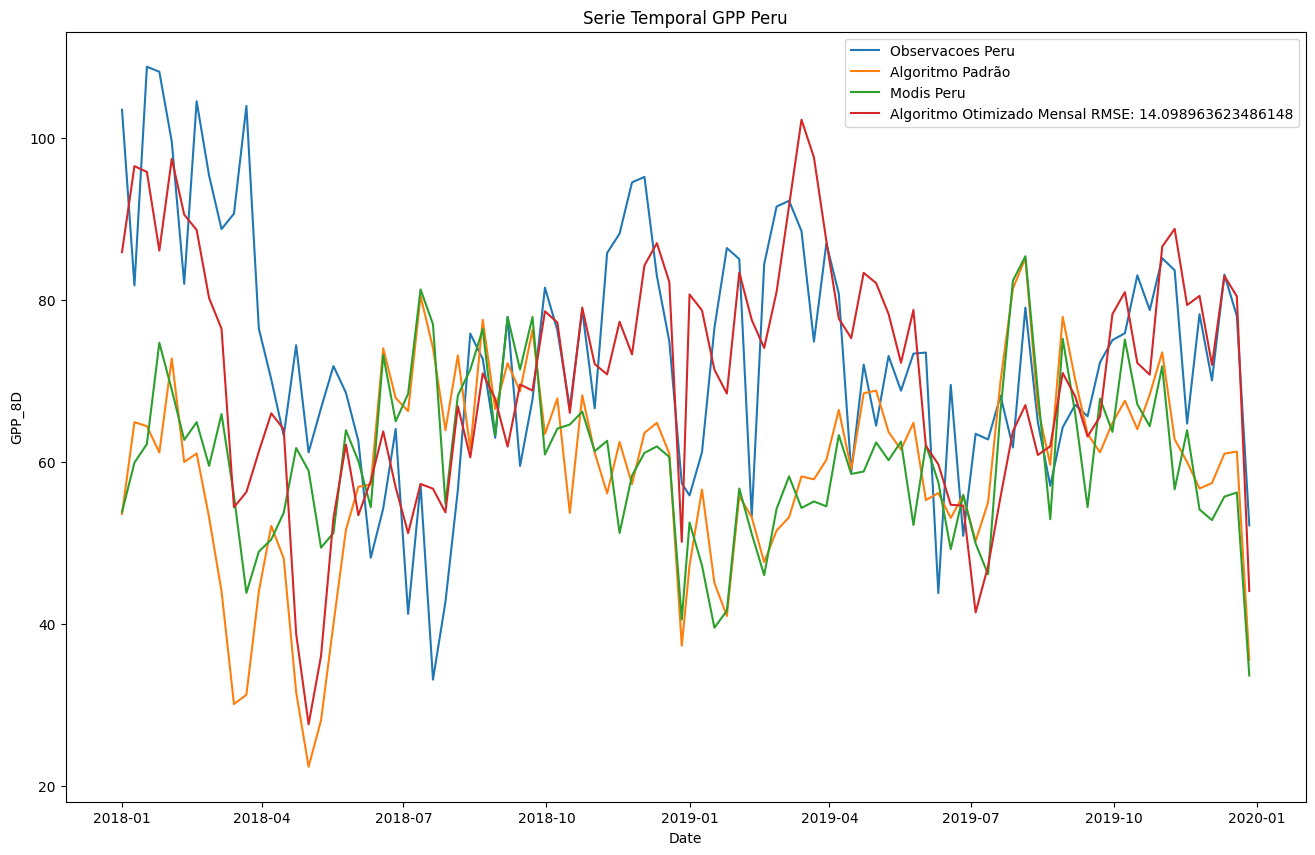

In [7]:
fig, ax = plt.subplots(figsize=(16, 10))

plt.xlabel("Date")
plt.ylabel("GPP_8D")
plt.title("Serie Temporal GPP Peru")

plt.plot(observacoes_peru)
plt.plot(gpp_algpad_peru)
plt.plot(gpp_modis_peru)
plt.plot(previsoes_peru)

plt.legend(['Observacoes Peru', 'Algoritmo Padrão', 'Modis Peru', 'Algoritmo Otimizado Mensal RMSE: ' + str(rmse_peru)])

# Box Plot Peru

C:\Users\Alan Breno\AppData\Local\Temp\ipykernel_11692\2364307559.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  observacoes_peru_monthly = observacoes_peru.resample('M').mean()
C:\Users\Alan Breno\AppData\Local\Temp\ipykernel_11692\2364307559.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  new_params_peru_monthly = previsoes_peru.squeeze().resample('M').mean()
C:\Users\Alan Breno\AppData\Local\Temp\ipykernel_11692\2364307559.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  peru_gpp_mod_monthly = gpp_modis_peru.resample('M').mean()
C:\Users\Alan Breno\AppData\Local\Temp\ipykernel_11692\2364307559.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  smoothed_gpp_algpad_peru_monthly = gpp_algpad_peru.resample('M').mean()


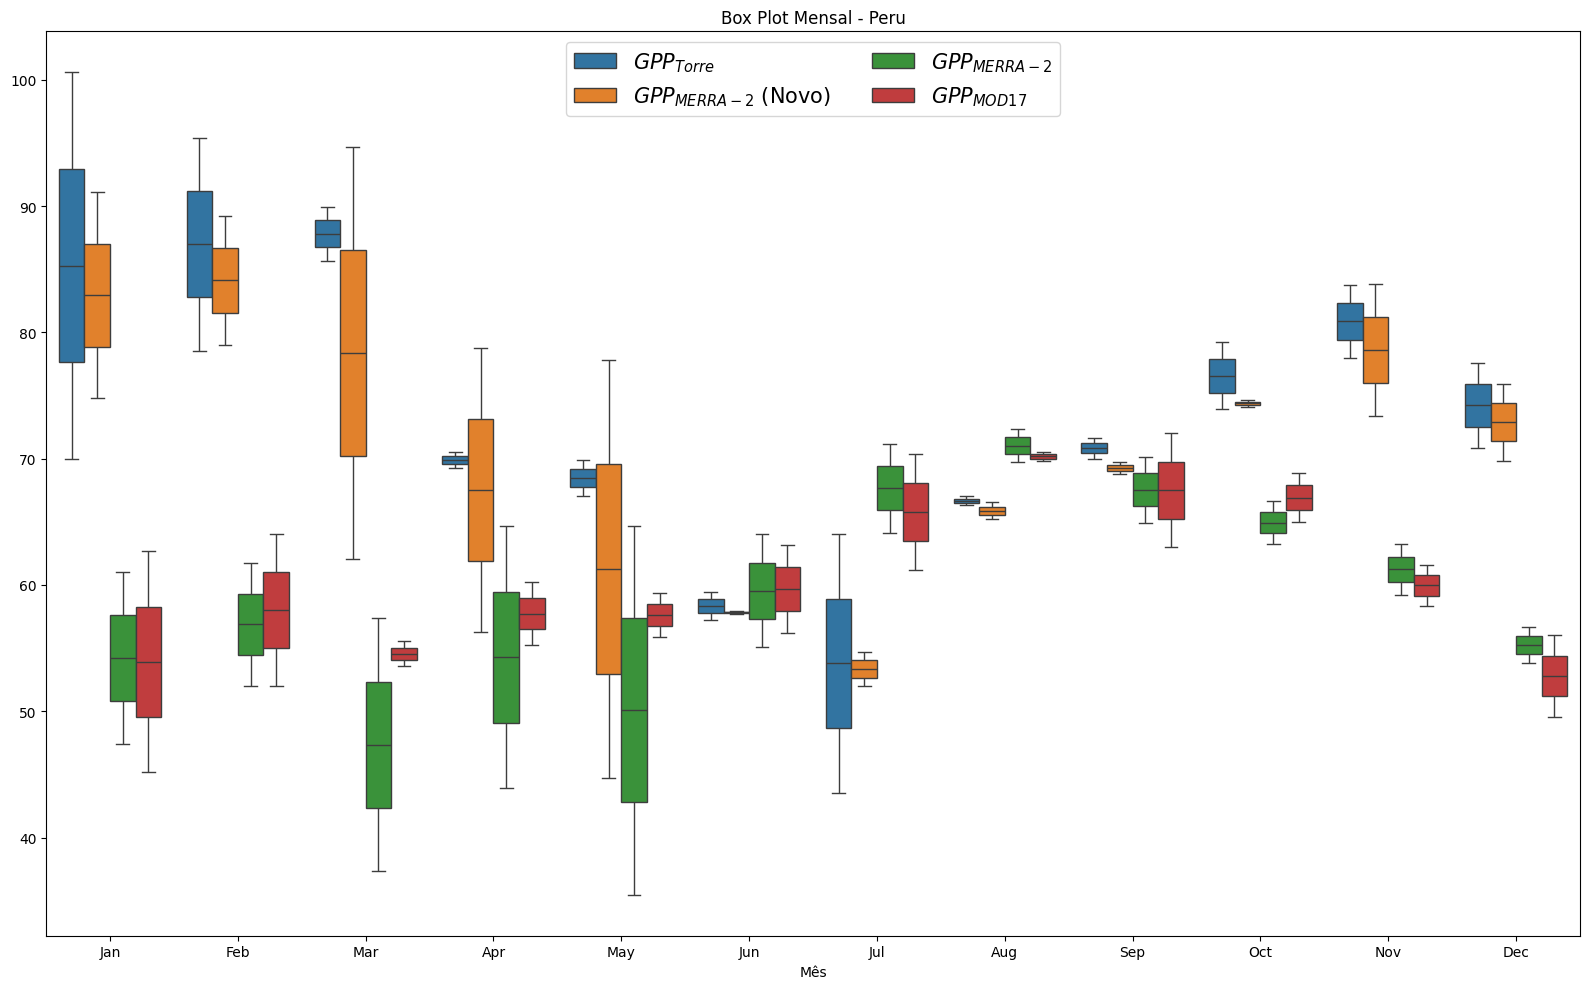

In [8]:
# Definindo os dados mensais de Peru
observacoes_peru_monthly = observacoes_peru.resample('M').mean()
new_params_peru_monthly = previsoes_peru.squeeze().resample('M').mean()
peru_gpp_mod_monthly = gpp_modis_peru.resample('M').mean()
smoothed_gpp_algpad_peru_monthly = gpp_algpad_peru.resample('M').mean()

# Criando DataFrame para Peru com os dados resampleados
df_peru = pd.DataFrame({
    '$GPP_{Torre}$': observacoes_peru_monthly,
    '$GPP_{MERRA-2}$ (Novo)': new_params_peru_monthly,
    '$GPP_{MERRA-2}$': smoothed_gpp_algpad_peru_monthly,
    '$GPP_{MOD17}$': peru_gpp_mod_monthly
})

# Resetando o índice para ter uma coluna de datas
df_peru.reset_index(inplace=True)

# Derretendo o DataFrame para ter todas as variáveis em uma única coluna
df_peru_melted = df_peru.melt(id_vars='index', var_name='Medição de GPP', value_name='Valor')

# Obtendo o ano e o mês de cada data
df_peru_melted['Ano'] = df_peru_melted['index'].dt.year
df_peru_melted['Mes'] = df_peru_melted['index'].dt.strftime('%b')


# Plotando os boxplots em subplots
fig, axes = plt.subplots(figsize=(16, 10)) 

# Boxplot para Peru
sns.boxplot(data=df_peru_melted, x='Mes', y='Valor', hue='Medição de GPP', dodge=True, ax=axes)
axes.set_title('Box Plot Mensal - Peru')  # Definindo título
axes.set_ylabel('')  # Definindo rótulo do eixo y
axes.set_xlabel('Mês')  # Definindo rótulo do eixo x
axes.legend(loc='upper center', fontsize=15, ncol=2)  # Definindo legenda

plt.tight_layout()  # Ajustando layout
#plt.savefig('BoxPlot_Santarem_Peru.png', dpi=300, bbox_inches='tight', pad_inches=0.2)  # Salvando figura
plt.show()

## Calculando GPP com a BPLUT Otimizada Mensal - Lue Otimizado - Caxiuana

In [9]:
bplut_mensal_caxiuana = pd.read_csv('GA_Caxiuana.csv')
bplut_mensal_caxiuana = bplut_mensal_caxiuana[['LUE_Max', 'Tmin_min', 'Tmin_max', 'VPD_min', 'VPD_max']].to_numpy()

num_mes = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
for i in range(12):
    previsoes_caxiuana = MOD17._gpp(bplut_mensal_caxiuana[i], drivers_caxiuana_mes['arr_'+str(i)][0], drivers_caxiuana_mes['arr_'+str(i)][1], drivers_caxiuana_mes['arr_'+str(i)][2], drivers_caxiuana_mes['arr_'+str(i)][3])
    previsoes_caxiuana = pd.DataFrame(previsoes_caxiuana,index=index_caxiuana[index_caxiuana.month == i+1])
   
    if i > 0:
        previsoes_caxiuana_2005 = pd.concat([previsoes_caxiuana_2005, previsoes_caxiuana['2005':'2005']], axis=0)
        previsoes_caxiuana_2006 = pd.concat([previsoes_caxiuana_2006, previsoes_caxiuana['2006':'2006']], axis=0)
        previsoes_caxiuana_2007 = pd.concat([previsoes_caxiuana_2007, previsoes_caxiuana['2007':'2007']], axis=0)
        previsoes_caxiuana_2008 = pd.concat([previsoes_caxiuana_2008, previsoes_caxiuana['2008':'2008']], axis=0)
        
    else:
        previsoes_caxiuana_2005 = previsoes_caxiuana['2005':'2005']
        previsoes_caxiuana_2006 = previsoes_caxiuana['2006':'2006']
        previsoes_caxiuana_2007 = previsoes_caxiuana['2007':'2007']
        previsoes_caxiuana_2008 = previsoes_caxiuana['2008':'2008']
        
previsoes_caxiuana_diario = pd.concat([previsoes_caxiuana_2005,
                                       previsoes_caxiuana_2006,
                                       previsoes_caxiuana_2007,
                                       previsoes_caxiuana_2008], axis=0)

gpp_2005 = previsoes_caxiuana_2005.resample('8D').sum()
gpp_2006 = previsoes_caxiuana_2006.resample('8D').sum()
gpp_2007 = previsoes_caxiuana_2007.resample('8D').sum()
gpp_2008 = previsoes_caxiuana_2008.resample('8D').sum()


previsoes_caxiuana = pd.concat([gpp_2005,gpp_2006,gpp_2007,gpp_2008],axis=0)
rmse_caxiuana = np.sqrt(mean_squared_error(y_true=observacoes_caxiuana, y_pred=previsoes_caxiuana))

# Plot GPP Caxiuana

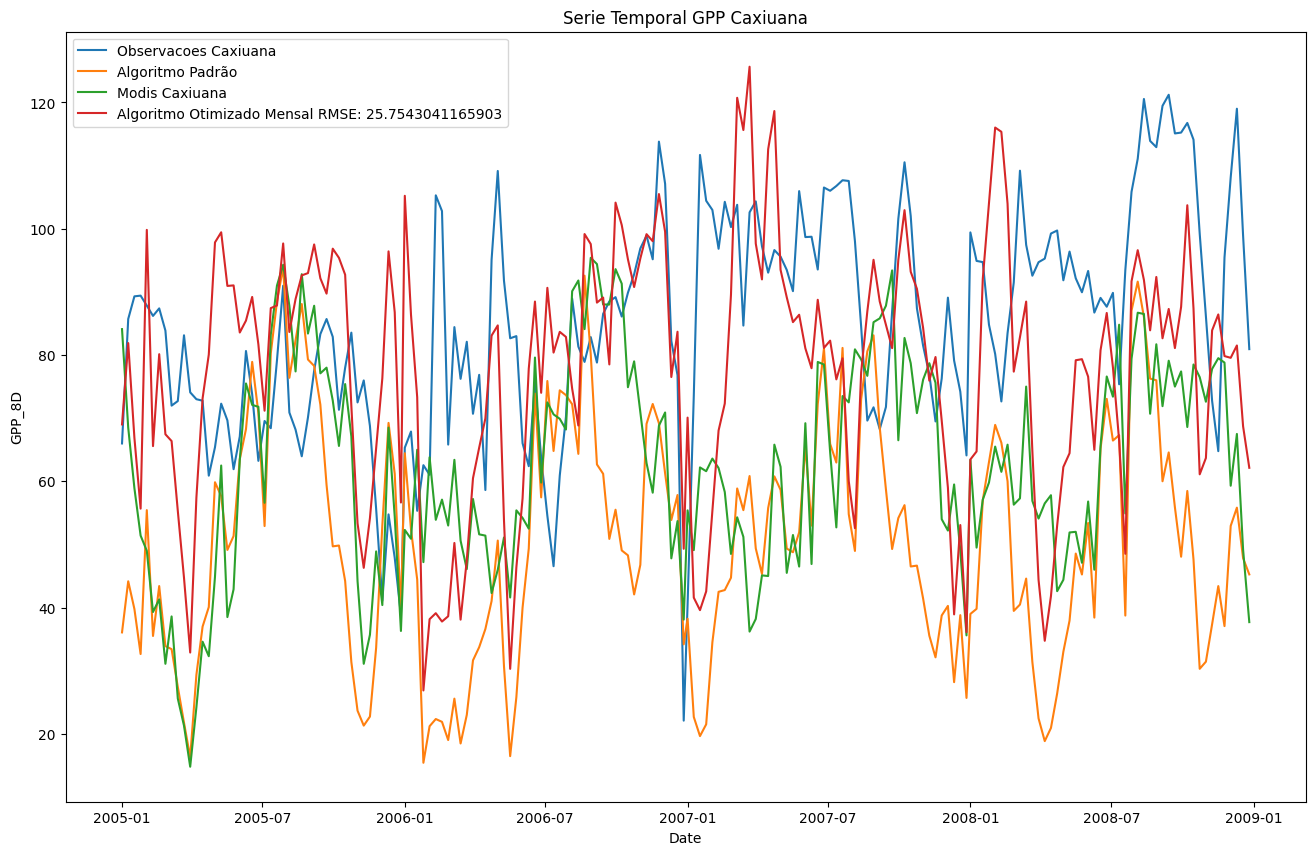

In [10]:
fig, ax = plt.subplots(figsize=(16, 10))

plt.xlabel("Date")
plt.ylabel("GPP_8D")
plt.title("Serie Temporal GPP Caxiuana")

plt.plot(observacoes_caxiuana)
plt.plot(gpp_algpad_caxiuana)
plt.plot(gpp_modis_caxiuana)
plt.plot(previsoes_caxiuana)

plt.legend(['Observacoes Caxiuana', 'Algoritmo Padrão', 'Modis Caxiuana', 'Algoritmo Otimizado Mensal RMSE: ' + str(rmse_caxiuana)])

# Box Plot Caxiuana

C:\Users\Alan Breno\AppData\Local\Temp\ipykernel_11692\4135892006.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  observacoes_caxiuana_monthly = observacoes_caxiuana.resample('M').mean()
C:\Users\Alan Breno\AppData\Local\Temp\ipykernel_11692\4135892006.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  new_params_caxiuana_monthly = previsoes_caxiuana.squeeze().resample('M').mean()
C:\Users\Alan Breno\AppData\Local\Temp\ipykernel_11692\4135892006.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  caxiuana_gpp_mod_monthly = gpp_modis_caxiuana.resample('M').mean()
C:\Users\Alan Breno\AppData\Local\Temp\ipykernel_11692\4135892006.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  smoothed_gpp_algpad_caxiuana_monthly = gpp_algpad_caxiuana.resample('M').mean()


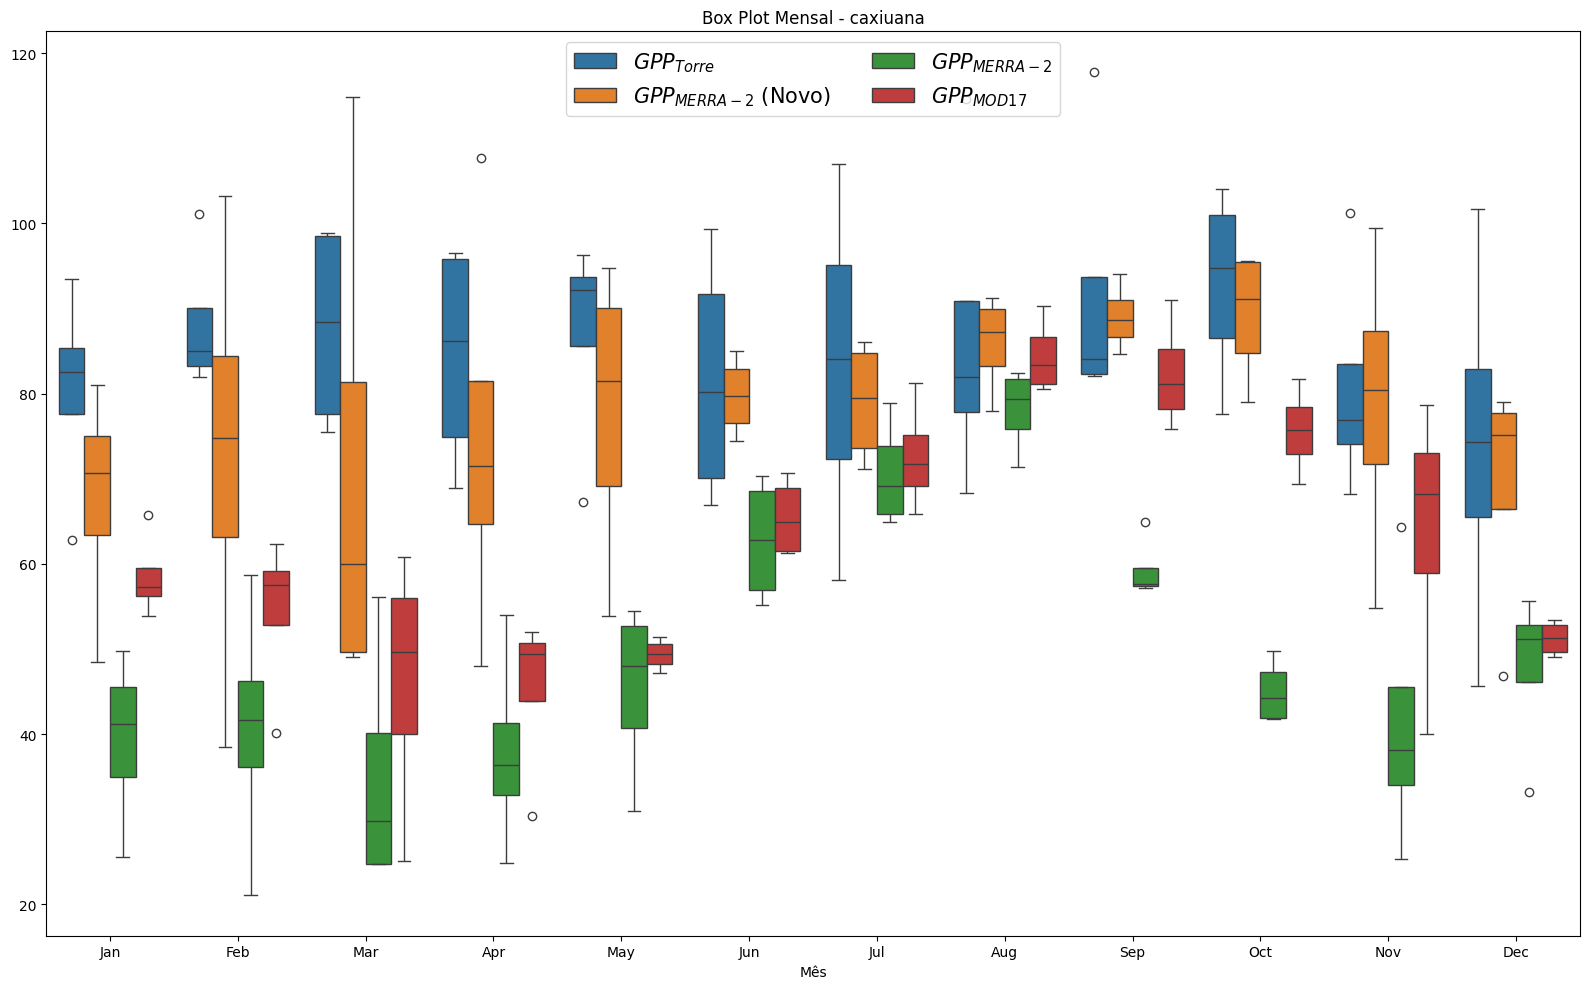

In [11]:
# Definindo os dados mensais de caxiuana
observacoes_caxiuana_monthly = observacoes_caxiuana.resample('M').mean()
new_params_caxiuana_monthly = previsoes_caxiuana.squeeze().resample('M').mean()
caxiuana_gpp_mod_monthly = gpp_modis_caxiuana.resample('M').mean()
smoothed_gpp_algpad_caxiuana_monthly = gpp_algpad_caxiuana.resample('M').mean()

# Criando DataFrame para caxiuana com os dados resampleados
df_caxiuana = pd.DataFrame({
    '$GPP_{Torre}$': observacoes_caxiuana_monthly,
    '$GPP_{MERRA-2}$ (Novo)': new_params_caxiuana_monthly,
    '$GPP_{MERRA-2}$': smoothed_gpp_algpad_caxiuana_monthly,
    '$GPP_{MOD17}$': caxiuana_gpp_mod_monthly
})

# Resetando o índice para ter uma coluna de datas
df_caxiuana.reset_index(inplace=True)

# Derretendo o DataFrame para ter todas as variáveis em uma única coluna
df_caxiuana_melted = df_caxiuana.melt(id_vars='index', var_name='Medição de GPP', value_name='Valor')

# Obtendo o ano e o mês de cada data
df_caxiuana_melted['Ano'] = df_caxiuana_melted['index'].dt.year
df_caxiuana_melted['Mes'] = df_caxiuana_melted['index'].dt.strftime('%b')


# Plotando os boxplots em subplots
fig, axes = plt.subplots(figsize=(16, 10)) 

# Boxplot para caxiuana
sns.boxplot(data=df_caxiuana_melted, x='Mes', y='Valor', hue='Medição de GPP', dodge=True, ax=axes)
axes.set_title('Box Plot Mensal - caxiuana')  # Definindo título
axes.set_ylabel('')  # Definindo rótulo do eixo y
axes.set_xlabel('Mês')  # Definindo rótulo do eixo x
axes.legend(loc='upper center', fontsize=15, ncol=2)  # Definindo legenda

plt.tight_layout()  # Ajustando layout
#plt.savefig('BoxPlot_Santarem_caxiuana.png', dpi=300, bbox_inches='tight', pad_inches=0.2)  # Salvando figura
plt.show()